In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic' 
#plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [4]:
time_series_data = pd.read_csv("cluster_1.csv")
#city_data = pd.read_csv('city_attributes.csv')
time_series_data.head()

,Unnamed: 0,날짜,강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양구군,강원도 양양군,강원도 영월군,...,충청북도 옥천군,충청북도 음성군,충청북도 제천시,충청북도 증평군,충청북도 진천군,충청북도 청주시 상당구,충청북도 청주시 서원구,충청북도 청주시 청원구,충청북도 청주시 흥덕구,충청북도 충주시
0,0,2020-01-01,197344.0,57981.0,55454.0,49980.0,122514.0,5862.5,121121.0,15620.5,...,30114.0,31052.0,34384.0,13863.5,22879.5,80150.0,82050.5,61400.5,79425.5,55475.0
1,1,2020-01-02,87395.0,25466.0,24920.0,24335.5,59955.0,4795.0,31328.5,10118.5,...,18221.0,29561.0,23145.5,11578.0,20384.0,60028.5,65030.0,52535.0,70486.5,37124.5
2,2,2020-01-03,92099.0,25329.5,28948.5,25868.5,62699.0,4830.0,31125.5,10983.0,...,20884.5,33568.5,27055.0,13398.0,22452.5,67788.0,74763.5,60886.0,81385.5,42959.0
3,3,2020-01-04,133178.5,37733.5,38171.0,33267.5,92459.5,5680.5,54148.5,17965.5,...,28812.0,36715.0,38836.0,15008.0,24892.0,89211.5,92617.0,75614.0,98311.5,60718.0
4,4,2020-01-05,111303.5,33246.5,32791.5,31566.5,76877.5,5621.0,47145.0,17104.5,...,29683.5,31223.5,33883.5,13846.0,25116.0,80279.5,76895.0,62632.5,81567.5,56045.5


In [5]:
time_series_data = time_series_data.iloc[:, 1:]
time_series_data.head()

,날짜,강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양구군,강원도 양양군,강원도 영월군,강원도 원주시,...,충청북도 옥천군,충청북도 음성군,충청북도 제천시,충청북도 증평군,충청북도 진천군,충청북도 청주시 상당구,충청북도 청주시 서원구,충청북도 청주시 청원구,충청북도 청주시 흥덕구,충청북도 충주시
0,2020-01-01,197344.0,57981.0,55454.0,49980.0,122514.0,5862.5,121121.0,15620.5,82344.5,...,30114.0,31052.0,34384.0,13863.5,22879.5,80150.0,82050.5,61400.5,79425.5,55475.0
1,2020-01-02,87395.0,25466.0,24920.0,24335.5,59955.0,4795.0,31328.5,10118.5,62604.5,...,18221.0,29561.0,23145.5,11578.0,20384.0,60028.5,65030.0,52535.0,70486.5,37124.5
2,2020-01-03,92099.0,25329.5,28948.5,25868.5,62699.0,4830.0,31125.5,10983.0,76751.5,...,20884.5,33568.5,27055.0,13398.0,22452.5,67788.0,74763.5,60886.0,81385.5,42959.0
3,2020-01-04,133178.5,37733.5,38171.0,33267.5,92459.5,5680.5,54148.5,17965.5,95287.5,...,28812.0,36715.0,38836.0,15008.0,24892.0,89211.5,92617.0,75614.0,98311.5,60718.0
4,2020-01-05,111303.5,33246.5,32791.5,31566.5,76877.5,5621.0,47145.0,17104.5,93229.5,...,29683.5,31223.5,33883.5,13846.0,25116.0,80279.5,76895.0,62632.5,81567.5,56045.5


In [6]:
cities_list = time_series_data.columns.tolist()[1:]
cities_list

['강원도 강릉시',
 '강원도 고성군',
 '강원도 동해시',
 '강원도 삼척시',
 '강원도 속초시',
 '강원도 양구군',
 '강원도 양양군',
 '강원도 영월군',
 '강원도 원주시',
 '강원도 인제군',
 '강원도 정선군',
 '강원도 철원군',
 '강원도 춘천시',
 '강원도 태백시',
 '강원도 평창군',
 '강원도 홍천군',
 '강원도 화천군',
 '강원도 횡성군',
 '경기도 가평군',
 '경기도 고양시 덕양구',
 '경기도 고양시 일산동구',
 '경기도 고양시 일산서구',
 '경기도 과천시',
 '경기도 광명시',
 '경기도 광주시',
 '경기도 구리시',
 '경기도 군포시',
 '경기도 김포시',
 '경기도 남양주시',
 '경기도 동두천시',
 '경기도 부천시',
 '경기도 성남시 분당구',
 '경기도 성남시 수정구',
 '경기도 성남시 중원구',
 '경기도 수원시 권선구',
 '경기도 수원시 영통구',
 '경기도 수원시 장안구',
 '경기도 수원시 팔달구',
 '경기도 시흥시',
 '경기도 안산시 단원구',
 '경기도 안산시 상록구',
 '경기도 안성시',
 '경기도 안양시 동안구',
 '경기도 안양시 만안구',
 '경기도 양주시',
 '경기도 양평군',
 '경기도 여주시',
 '경기도 연천군',
 '경기도 오산시',
 '경기도 용인시 기흥구',
 '경기도 용인시 수지구',
 '경기도 용인시 처인구',
 '경기도 의왕시',
 '경기도 의정부시',
 '경기도 이천시',
 '경기도 파주시',
 '경기도 평택시',
 '경기도 포천시',
 '경기도 하남시',
 '경기도 화성시',
 '경상남도 거제시',
 '경상남도 거창군',
 '경상남도 고성군',
 '경상남도 김해시',
 '경상남도 남해군',
 '경상남도 밀양시',
 '경상남도 사천시',
 '경상남도 산청군',
 '경상남도 양산시',
 '경상남도 의령군',
 '경상남도 진주시',
 '경상남도 창녕군',
 '경상남도 창원시 마산합포구',
 '경상남도 창원시 마산회원구',
 '경상남도 창원시 성산

In [7]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Columns: 251 entries, 날짜 to 충청북도 충주시
dtypes: float64(250), object(1)
memory usage: 1.4+ MB


In [8]:
time_series_data['날짜'] = pd.to_datetime(time_series_data['날짜'])
time_series_data.head()

,날짜,강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양구군,강원도 양양군,강원도 영월군,강원도 원주시,...,충청북도 옥천군,충청북도 음성군,충청북도 제천시,충청북도 증평군,충청북도 진천군,충청북도 청주시 상당구,충청북도 청주시 서원구,충청북도 청주시 청원구,충청북도 청주시 흥덕구,충청북도 충주시
0,2020-01-01,197344.0,57981.0,55454.0,49980.0,122514.0,5862.5,121121.0,15620.5,82344.5,...,30114.0,31052.0,34384.0,13863.5,22879.5,80150.0,82050.5,61400.5,79425.5,55475.0
1,2020-01-02,87395.0,25466.0,24920.0,24335.5,59955.0,4795.0,31328.5,10118.5,62604.5,...,18221.0,29561.0,23145.5,11578.0,20384.0,60028.5,65030.0,52535.0,70486.5,37124.5
2,2020-01-03,92099.0,25329.5,28948.5,25868.5,62699.0,4830.0,31125.5,10983.0,76751.5,...,20884.5,33568.5,27055.0,13398.0,22452.5,67788.0,74763.5,60886.0,81385.5,42959.0
3,2020-01-04,133178.5,37733.5,38171.0,33267.5,92459.5,5680.5,54148.5,17965.5,95287.5,...,28812.0,36715.0,38836.0,15008.0,24892.0,89211.5,92617.0,75614.0,98311.5,60718.0
4,2020-01-05,111303.5,33246.5,32791.5,31566.5,76877.5,5621.0,47145.0,17104.5,93229.5,...,29683.5,31223.5,33883.5,13846.0,25116.0,80279.5,76895.0,62632.5,81567.5,56045.5


In [9]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Columns: 251 entries, 날짜 to 충청북도 충주시
dtypes: datetime64[ns](1), float64(250)
memory usage: 1.4 MB


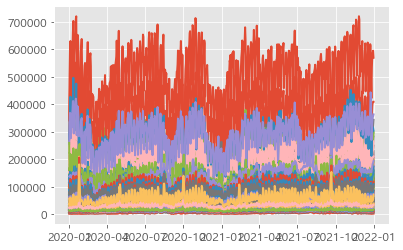

In [10]:
plt.plot(time_series_data['날짜'],time_series_data[cities_list])

Text(0, 0.5, 'Number of visitors')

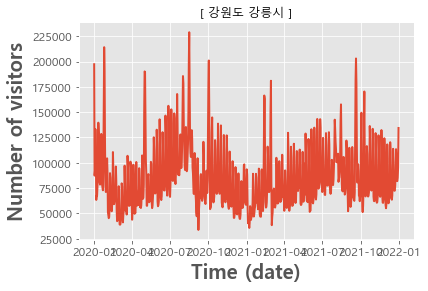

In [11]:
plt.plot(time_series_data['날짜'],time_series_data['강원도 강릉시'])
plt.title('[ 강원도 강릉시 ]')
plt.xlabel('Time (date)',fontsize=20)
plt.ylabel('Number of visitors',fontsize=20)

In [12]:
data_array = np.array(time_series_data.T.drop('날짜').values)
data_array

array([[197344.0, 87395.0, 92099.0, ..., 85176.0, 95431.0, 134372.0],
       [57981.0, 25466.0, 25329.5, ..., 26351.5, 30772.0, 47218.5],
       [55454.0, 24920.0, 28948.5, ..., 26173.0, 28717.5, 41352.5],
       ...,
       [61400.5, 52535.0, 60886.0, ..., 64134.0, 64806.0, 73353.0],
       [79425.5, 70486.5, 81385.5, ..., 90156.5, 92939.0, 102445.0],
       [55475.0, 37124.5, 42959.0, ..., 48429.5, 53133.5, 70637.0]],
      dtype=object)

In [13]:
!pip install tslearn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [14]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=10, metric="dtw", max_iter=10, n_jobs=-1)
model.fit(data_array)

KeyboardInterrupt: 

In [15]:
y=model.fit_predict(data_array)
x=time_series_data['날짜']

KeyboardInterrupt: 

In [16]:
#proba = model.predict_proba(data_array)
#proba

NameError: name 'y' is not defined

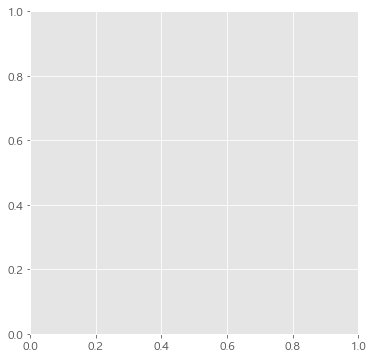

In [17]:
plt.figure(figsize=(20,70))
k_dict = {'1':0,'2':0,'3':0,
          '4':1,'5':1,'6':1,
          '7':2,'8':2,'9':2, 
          '10':3,'11':3,'12':3,
          '13':4,'14':4,'15':4, 
          '16':5,'17':5,'18':5,
          '19':6,'20':6,'21':6, 
          '22':7,'23':7,'24':7,
          '25':8,'26':8,'27':8, 
          '28':9,'29':9,'30':9 }
colors = ['darkred']*3+['tomato']*3+['gold']*3+['yellowgreen']*3+['darkgreen']*3+['lightseagreen']*3+['navy']*3+['peru']*3+['indigo']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3+['Class 3']*3+['Class 4']*3+['Class 5']*3+['Class 6']*3+['Class 7']*3+['Class 8']*3+['Class 9']*3
for j in range(1,31):
    plt.subplot(10,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'-',color=colors[j-1])
    plt.ylabel('Number of visitors',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('City=%s, Class = %s'%(cities_list[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

NameError: name 'y' is not defined

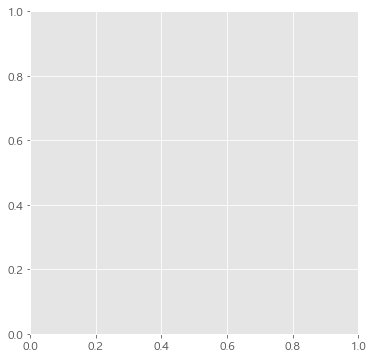

In [18]:
plt.figure(figsize=(20,70))
k_dict = {'1':0,'2':0,'3':0,
          '4':1,'5':1,'6':1,
          '7':2,'8':2,'9':2, 
          '10':3,'11':3,'12':3,
          '13':4,'14':4,'15':4, 
          '16':5,'17':5,'18':5,
          '19':6,'20':6,'21':6, 
          '22':7,'23':7,'24':7,
          '25':8,'26':8,'27':8, 
          '28':9,'29':9,'30':9 }
colors = ['darkred']*3+['tomato']*3+['gold']*3+['yellowgreen']*3+['darkgreen']*3+['lightseagreen']*3+['navy']*3+['peru']*3+['indigo']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3+['Class 3']*3+['Class 4']*3+['Class 5']*3+['Class 6']*3+['Class 7']*3+['Class 8']*3+['Class 9']*3
for i in range(1,31):
    plt.subplot(10,3,i)
    k = np.random.choice(np.where(y==k_dict[str(i)])[0])
    plt.hist(data_array[k],color=colors[i-1])
    plt.ylabel('Number of visitors',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('City=%s, Class = %s'%(cities_list[k],Names[i-1]),fontsize=20)
    plt.xlim(data_array.min(),data_array.max())

In [19]:
y

NameError: name 'y' is not defined

In [20]:
list_index = []

for j in range(0,10):
    list_index.append([])
    for i, value in enumerate(y):
        if value == j :
            list_index[j].append(i)
            
list_index    

NameError: name 'y' is not defined

In [21]:
time_series_data_droped = time_series_data.iloc[:, 1:]
time_series_data_droped

,강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양구군,강원도 양양군,강원도 영월군,강원도 원주시,강원도 인제군,...,충청북도 옥천군,충청북도 음성군,충청북도 제천시,충청북도 증평군,충청북도 진천군,충청북도 청주시 상당구,충청북도 청주시 서원구,충청북도 청주시 청원구,충청북도 청주시 흥덕구,충청북도 충주시
0,197344.0,57981.0,55454.0,49980.0,122514.0,5862.5,121121.0,15620.5,82344.5,56574.0,...,30114.0,31052.0,34384.0,13863.5,22879.5,80150.0,82050.5,61400.5,79425.5,55475.0
1,87395.0,25466.0,24920.0,24335.5,59955.0,4795.0,31328.5,10118.5,62604.5,16138.5,...,18221.0,29561.0,23145.5,11578.0,20384.0,60028.5,65030.0,52535.0,70486.5,37124.5
2,92099.0,25329.5,28948.5,25868.5,62699.0,4830.0,31125.5,10983.0,76751.5,16985.5,...,20884.5,33568.5,27055.0,13398.0,22452.5,67788.0,74763.5,60886.0,81385.5,42959.0
3,133178.5,37733.5,38171.0,33267.5,92459.5,5680.5,54148.5,17965.5,95287.5,27475.0,...,28812.0,36715.0,38836.0,15008.0,24892.0,89211.5,92617.0,75614.0,98311.5,60718.0
4,111303.5,33246.5,32791.5,31566.5,76877.5,5621.0,47145.0,17104.5,93229.5,28280.0,...,29683.5,31223.5,33883.5,13846.0,25116.0,80279.5,76895.0,62632.5,81567.5,56045.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,82572.0,23656.5,24678.5,20821.5,49224.0,5677.0,25917.5,10458.0,73815.0,15158.5,...,18042.5,36431.5,26554.5,12995.5,28752.5,65250.5,67182.5,61656.0,84203.0,45153.5
727,81914.0,24405.5,25697.0,22309.0,49304.5,5869.5,25368.0,10248.0,73766.0,15249.5,...,18399.5,38486.0,26155.5,14038.5,31909.5,66076.5,69293.0,63227.5,86471.0,47764.5
728,85176.0,26351.5,26173.0,23338.0,51299.5,6020.0,29123.5,10846.5,73069.5,16145.5,...,20223.0,41226.5,26645.5,15109.5,32553.5,71778.0,71239.0,64134.0,90156.5,48429.5
729,95431.0,30772.0,28717.5,24640.0,61778.5,6345.5,32882.5,11459.0,78239.0,18273.5,...,21532.0,40852.0,29120.0,14780.5,33001.5,71393.0,74231.5,64806.0,92939.0,53133.5


NameError: name 'x' is not defined

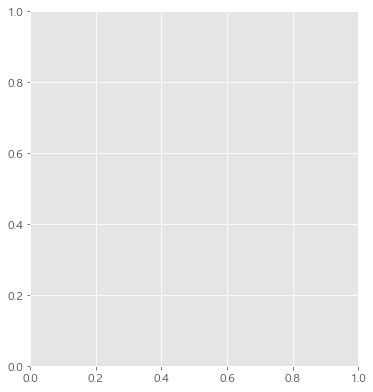

In [22]:
#군집별 plot 그리기 (모든 군집 예시)

plt.figure(figsize=(20,30))

for i in range(1,11):
    plt.subplot(4,3,i)
    plt.plot(x,time_series_data_droped.iloc[:, list_index[i-1]],'-')
    plt.ylabel('Number of visitors',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('Class = %d'%i,fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

In [23]:
#군집별 plot 그리기 (군집 0번 예시)

cluster_data_array = np.array(time_series_data_droped.iloc[:, list_index[0]].T.values)

plt.figure(figsize=(30,10))
plt.plot(x,time_series_data_droped.iloc[:, list_index[0]],'-')
plt.ylabel('Number of visitors',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Class 0',fontsize=20)
plt.ylim(cluster_data_array.min(),cluster_data_array.max())

NameError: name 'x' is not defined

<Figure size 2160x720 with 0 Axes>

In [24]:
cluster_data_array = np.array(time_series_data_droped.iloc[:, list_index[1]].T.values)

plt.figure(figsize=(30,10))
plt.plot(x,time_series_data_droped.iloc[:, list_index[1]],'-')
plt.ylabel('Number of visitors',fontsize=20)
plt.xlabel('Time',fontsize=20)
plt.title('Class 1',fontsize=20)
plt.ylim(cluster_data_array.min(),cluster_data_array.max())

IndexError: list index out of range

In [25]:
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=10, n_jobs=-1)
        kmeans.fit_predict(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(data_array, 10)


KeyboardInterrupt: 

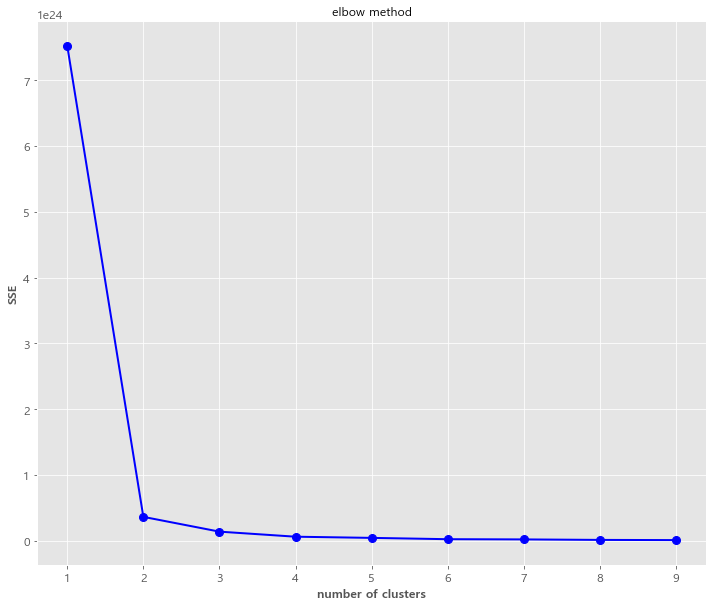

In [90]:
def elbow_soft(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = TimeSeriesKMeans(n_clusters=i, metric="softdtw", max_iter=10, n_jobs=-1)
        kmeans.fit_predict(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow_soft(data_array, 10)

In [93]:
# 클러스터 5개, 6개, 7개에 대한 성능 평가

from tslearn.clustering import silhouette_score
from sklearn.preprocessing import minmax_scale

sil_scores = []
for i in range(5, 8):
    n_kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=10, n_jobs=-1)
    n_kmeans.fit(data_array)
    sil_scores.append(silhouette_score(data_array, n_kmeans.predict(data_array), metric="dtw"))

result_df = pd.DataFrame(data={
                "no_clusters": range(5, 8),
                "silhouette_score": sil_scores})

result_df

C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


,no_clusters,silhouette_score
0,5,0.505936
1,6,0.459523
2,7,0.408647


In [97]:
sil_scores_10 = []
for i in range(2, 10):
    n_kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=10, n_jobs=-1)
    n_kmeans.fit(data_array)
    sil_scores_10.append(silhouette_score(data_array, n_kmeans.predict(data_array), metric="dtw"))

result_df = pd.DataFrame(data={
                "no_clusters": range(2, 10),
                "silhouette_score": sil_scores_10})

result_df

C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))
C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  

,no_clusters,silhouette_score
0,2,0.618792
1,3,0.570228
2,4,0.508611
3,5,0.520557
4,6,0.461671
5,7,0.378289
6,8,0.343939
7,9,0.337523


In [ ]:
kmeans_5 = TimeSeriesKMeans(n_clusters=5, metric="dtw", n_jobs=-1)

y_5=kmeans_5.fit_predict(data_array)
x_5=time_series_data['날짜']

y_5

In [99]:
kmeans_5.inertia_

111481518959.25104

In [100]:
silhouette_score(data_array, kmeans_5.predict(data_array), metric="dtw")

C:\Users\kncco\anaconda3\lib\site-packages\tslearn\utils\utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 250 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


0.5165364672183426

In [26]:
list5_index = []

for j in range(0,5):
    list5_index.append([])
    for i, value in enumerate(y_5):
        if value == j :
            list5_index[j].append(i)
            
list5_index

NameError: name 'y_5' is not defined

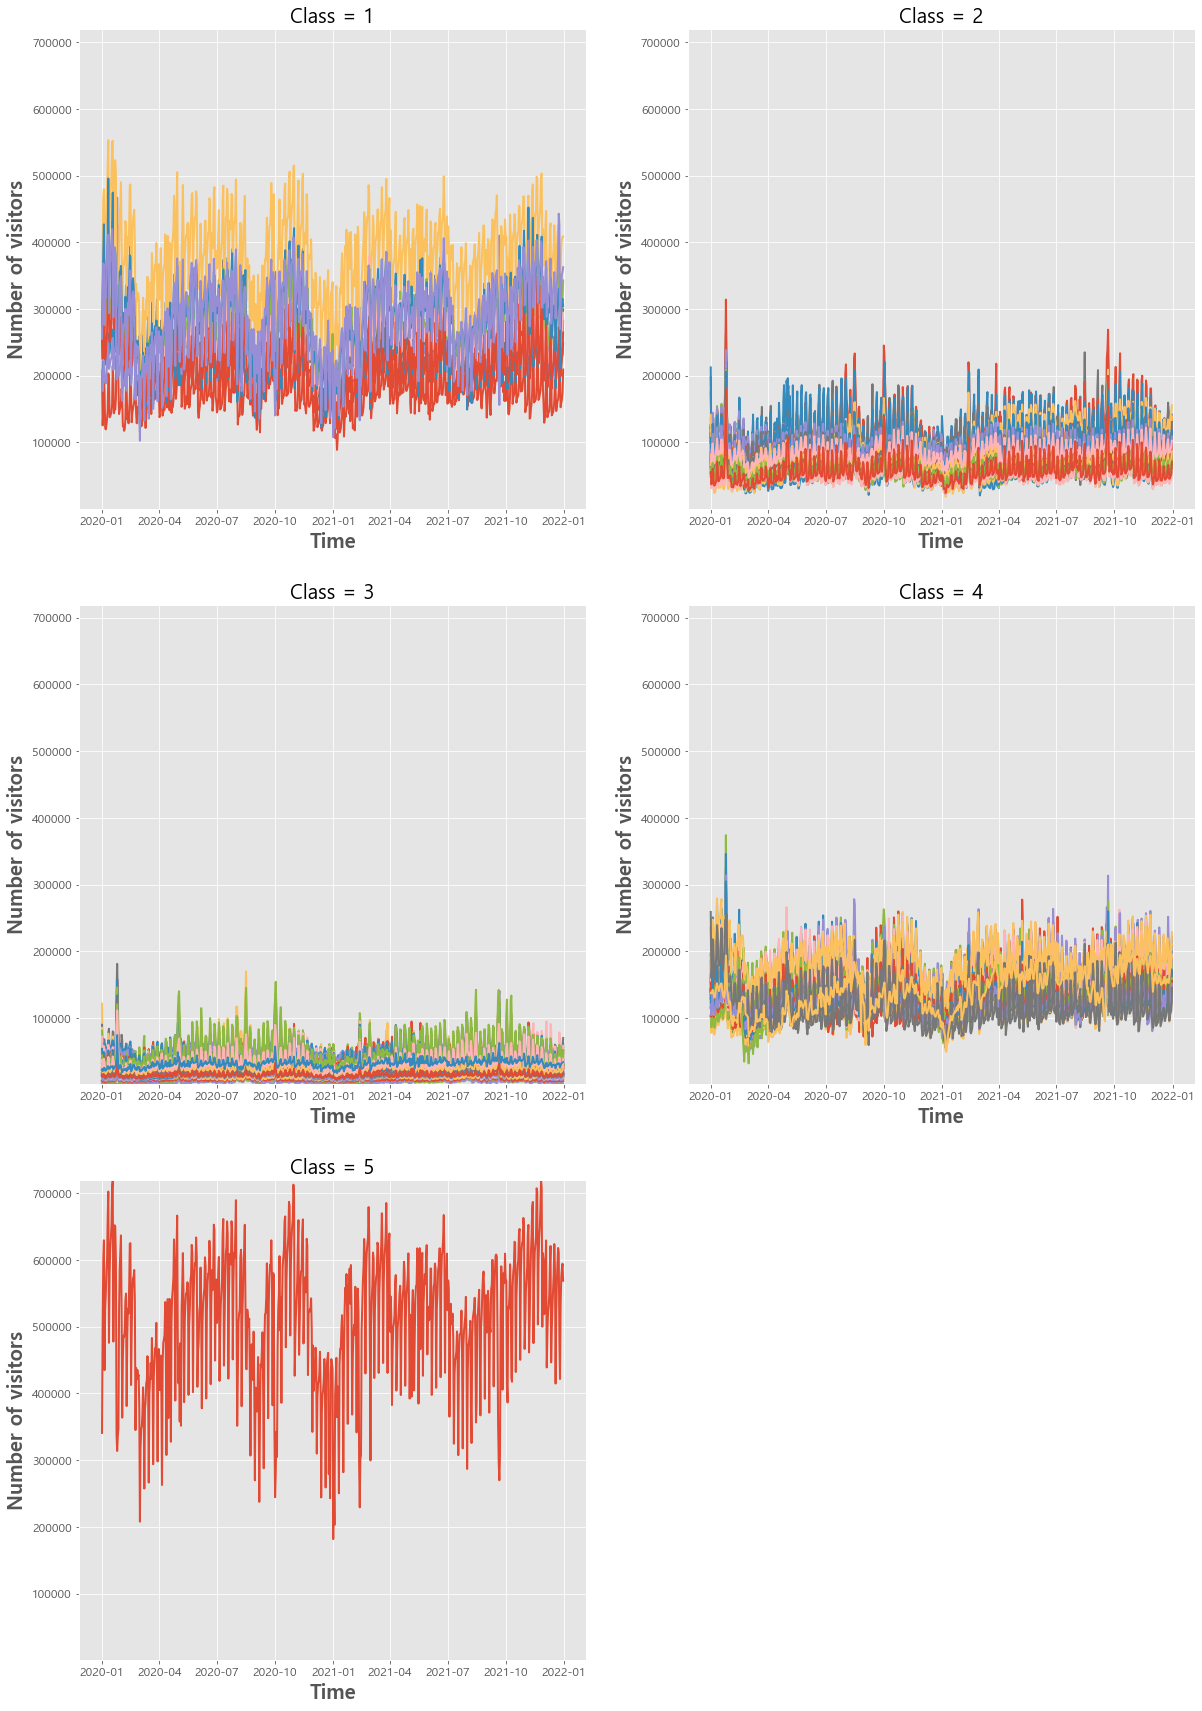

In [102]:
#군집별 plot 그리기 (모든 군집 예시)

plt.figure(figsize=(20,30))

for i in range(1,6):
    plt.subplot(3,2,i)
    plt.plot(x,time_series_data_droped.iloc[:, list5_index[i-1]],'-')
    plt.ylabel('Number of visitors',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('Class = %d'%i,fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

In [105]:
cities_list_5 = []

for j in range(0,5):
    cities_list_5.append([])
    for value in list5_index[j]:
        cities_list_5[j].append(cities_list[value])
            
cities_list_5

[['경기도 남양주시',
  '경기도 성남시 분당구',
  '경기도 화성시',
  '서울특별시 마포구',
  '서울특별시 서초구',
  '서울특별시 송파구',
  '서울특별시 영등포구',
  '서울특별시 용산구',
  '서울특별시 종로구',
  '서울특별시 중구'],
 ['강원도 강릉시',
  '강원도 속초시',
  '강원도 원주시',
  '강원도 춘천시',
  '경기도 가평군',
  '경기도 고양시 일산서구',
  '경기도 광명시',
  '경기도 군포시',
  '경기도 성남시 수정구',
  '경기도 성남시 중원구',
  '경기도 수원시 권선구',
  '경기도 수원시 장안구',
  '경기도 안산시 상록구',
  '경기도 안성시',
  '경기도 안양시 동안구',
  '경기도 안양시 만안구',
  '경기도 양주시',
  '경기도 양평군',
  '경기도 여주시',
  '경기도 오산시',
  '경기도 용인시 수지구',
  '경기도 의왕시',
  '경기도 의정부시',
  '경기도 이천시',
  '경기도 평택시',
  '경기도 포천시',
  '경상남도 거제시',
  '경상남도 김해시',
  '경상남도 양산시',
  '경상남도 진주시',
  '경상남도 창원시 마산합포구',
  '경상남도 창원시 마산회원구',
  '경상남도 창원시 성산구',
  '경상남도 창원시 의창구',
  '경상북도 경산시',
  '경상북도 경주시',
  '경상북도 구미시',
  '경상북도 포항시 남구',
  '경상북도 포항시 북구',
  '광주광역시 광산구',
  '광주광역시 남구',
  '광주광역시 동구',
  '광주광역시 북구',
  '대구광역시 남구',
  '대구광역시 달성군',
  '대전광역시 대덕구',
  '대전광역시 동구',
  '대전광역시 중구',
  '부산광역시 강서구',
  '부산광역시 금정구',
  '부산광역시 기장군',
  '부산광역시 남구',
  '부산광역시 동구',
  '부산광역시 동래구',
  '부산광역시 북구',
  '부산광역시 사상구',
  '부산광역시 사하구',
  '부산

In [115]:
for j in range(1,6):
    print("Class %d : "%j)
    for i in cities_list_5[j-1]:
        print(i, end=', ')
    print()

Class 1 : 
경기도 남양주시, 경기도 성남시 분당구, 경기도 화성시, 서울특별시 마포구, 서울특별시 서초구, 서울특별시 송파구, 서울특별시 영등포구, 서울특별시 용산구, 서울특별시 종로구, 서울특별시 중구, 
Class 2 : 
강원도 강릉시, 강원도 속초시, 강원도 원주시, 강원도 춘천시, 경기도 가평군, 경기도 고양시 일산서구, 경기도 광명시, 경기도 군포시, 경기도 성남시 수정구, 경기도 성남시 중원구, 경기도 수원시 권선구, 경기도 수원시 장안구, 경기도 안산시 상록구, 경기도 안성시, 경기도 안양시 동안구, 경기도 안양시 만안구, 경기도 양주시, 경기도 양평군, 경기도 여주시, 경기도 오산시, 경기도 용인시 수지구, 경기도 의왕시, 경기도 의정부시, 경기도 이천시, 경기도 평택시, 경기도 포천시, 경상남도 거제시, 경상남도 김해시, 경상남도 양산시, 경상남도 진주시, 경상남도 창원시 마산합포구, 경상남도 창원시 마산회원구, 경상남도 창원시 성산구, 경상남도 창원시 의창구, 경상북도 경산시, 경상북도 경주시, 경상북도 구미시, 경상북도 포항시 남구, 경상북도 포항시 북구, 광주광역시 광산구, 광주광역시 남구, 광주광역시 동구, 광주광역시 북구, 대구광역시 남구, 대구광역시 달성군, 대전광역시 대덕구, 대전광역시 동구, 대전광역시 중구, 부산광역시 강서구, 부산광역시 금정구, 부산광역시 기장군, 부산광역시 남구, 부산광역시 동구, 부산광역시 동래구, 부산광역시 북구, 부산광역시 사상구, 부산광역시 사하구, 부산광역시 수영구, 부산광역시 연제구, 부산광역시 중구, 서울특별시 강북구, 서울특별시 금천구, 서울특별시 도봉구, 서울특별시 양천구, 서울특별시 은평구, 서울특별시 중랑구, 세종특별자치시 세종특별자치시, 울산광역시 남구, 울산광역시 북구, 울산광역시 울주군, 울산광역시 중구, 인천광역시 계양구, 인천광역시 미추홀구, 인천광역시 연수구, 전라남도 목포시, 전라남도 순천시, 전라남도 여수시, 전라북도 군산시, 전라북도 익산시, 전라북도 전주시 덕진

In [28]:
test_df = time_series_data_droped.iloc[:, :3]
test_df
test_df.iloc[:, 1]

0      57981.0
1      25466.0
2      25329.5
3      37733.5
4      33246.5
        ...   
726    23656.5
727    24405.5
728    26351.5
729    30772.0
730    47218.5
Name: 강원도 고성군, Length: 731, dtype: float64

In [29]:
scaled_test_df = pd.DataFrame(columns=cities_list)
scaled_test_df

,강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양구군,강원도 양양군,강원도 영월군,강원도 원주시,강원도 인제군,...,충청북도 옥천군,충청북도 음성군,충청북도 제천시,충청북도 증평군,충청북도 진천군,충청북도 청주시 상당구,충청북도 청주시 서원구,충청북도 청주시 청원구,충청북도 청주시 흥덕구,충청북도 충주시


# ================ 정규화 후 군집 ==================

In [31]:
from sklearn.preprocessing import MinMaxScaler
  
minmax_scaler = MinMaxScaler()
scaled_time_series_data = pd.DataFrame(columns = cities_list)

for i in range(1, 251):
    minmax_scaled = minmax_scaler.fit_transform(time_series_data_droped.iloc[:, (i-1):i])
    temp = pd.DataFrame(minmax_scaled)
    scaled_time_series_data.iloc[:, i-1] = temp.iloc[:, 0]

scaled_time_series_data

,강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양구군,강원도 양양군,강원도 영월군,강원도 원주시,강원도 인제군,...,충청북도 옥천군,충청북도 음성군,충청북도 제천시,충청북도 증평군,충청북도 진천군,충청북도 청주시 상당구,충청북도 청주시 서원구,충청북도 청주시 청원구,충청북도 청주시 흥덕구,충청북도 충주시
0,0.838220,0.541841,0.593672,0.506206,0.722866,0.161233,0.690196,0.191747,0.281928,0.660288,...,0.206267,0.084978,0.216292,0.193232,0.096622,0.331781,0.358420,0.273036,0.306549,0.199750
1,0.274912,0.185725,0.181053,0.168105,0.279958,0.101335,0.117488,0.087628,0.160585,0.121109,...,0.079063,0.069722,0.101969,0.117810,0.052826,0.165515,0.200325,0.181470,0.221430,0.082590
2,0.299012,0.184230,0.235492,0.188316,0.299385,0.103299,0.116193,0.103987,0.247547,0.132403,...,0.107551,0.110725,0.141738,0.177870,0.089128,0.229632,0.290735,0.267722,0.325212,0.119841
3,0.509477,0.320083,0.360119,0.285866,0.510085,0.151021,0.263037,0.236124,0.361489,0.272273,...,0.192341,0.142919,0.261580,0.231000,0.131941,0.406658,0.456567,0.419839,0.486386,0.233224
4,0.397403,0.270940,0.287424,0.263440,0.399767,0.147683,0.218368,0.219830,0.348838,0.283007,...,0.201662,0.086732,0.211201,0.192654,0.135872,0.332851,0.310533,0.285761,0.326946,0.203392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.250202,0.165906,0.177789,0.121776,0.203985,0.150825,0.082976,0.094052,0.229497,0.108041,...,0.077153,0.140018,0.136647,0.164588,0.199693,0.208665,0.220319,0.275675,0.352041,0.133852
727,0.246831,0.174110,0.191553,0.141387,0.204554,0.161626,0.079471,0.090078,0.229195,0.109255,...,0.080972,0.161038,0.132588,0.199007,0.255098,0.215490,0.239922,0.291906,0.373638,0.150522
728,0.263543,0.195423,0.197985,0.154954,0.218679,0.170071,0.103424,0.101404,0.224914,0.121202,...,0.100475,0.189078,0.137573,0.234350,0.266400,0.262602,0.257997,0.301269,0.408732,0.154767
729,0.316083,0.243838,0.232370,0.172119,0.292868,0.188335,0.127400,0.112995,0.256691,0.149578,...,0.114476,0.185246,0.162744,0.223493,0.274263,0.259421,0.285793,0.308210,0.435227,0.184800


In [34]:
# 클러스터 성능 평가 - 실루엣

from tslearn.clustering import silhouette_score
from sklearn.preprocessing import minmax_scale

sil_scores = []
for i in range(4, 21):
    n_kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=10, n_jobs=-1)
    n_kmeans.fit(scaled_time_series_data)
    sil_scores.append(silhouette_score(scaled_time_series_data, n_kmeans.predict(scaled_time_series_data), metric="dtw"))

result_df = pd.DataFrame(data={
                "no_clusters": range(4, 21),
                "silhouette_score": sil_scores})

result_df

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these ar

,no_clusters,silhouette_score
0,4,0.149839
1,5,0.153747
2,6,0.166894
3,7,0.146163
4,8,0.162238
5,9,0.142600
6,10,0.115548
7,11,0.115491
8,12,0.106515
9,13,0.099559


In [35]:
# 클러스터 성능 평가 - 실루엣

from tslearn.clustering import silhouette_score
from sklearn.preprocessing import minmax_scale

sil_scores = []
for i in range(1, 10):
    n_kmeans = TimeSeriesKMeans(n_clusters=i, metric="dtw", n_jobs=-1)
    n_kmeans.fit(scaled_time_series_data)
    sil_scores.append(silhouette_score(scaled_time_series_data, n_kmeans.predict(scaled_time_series_data), metric="dtw"))

result_df = pd.DataFrame(data={
                "num_clusters": range(1, 10),
                "silhouette_score": sil_scores})

result_df

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 731 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these ar

,no_clusters,silhouette_score
0,4,0.177074
1,5,0.124819
2,6,0.155186
3,7,0.089471
4,8,0.100100
5,9,0.120406
6,10,0.108746
7,11,0.125534
8,12,0.110384
9,13,0.094283


In [129]:
test_df

,강원도 강릉시,강원도 고성군,강원도 동해시
0,197344.0,57981.0,55454.0
1,87395.0,25466.0,24920.0
2,92099.0,25329.5,28948.5
3,133178.5,37733.5,38171.0
4,111303.5,33246.5,32791.5
...,...,...,...
726,82572.0,23656.5,24678.5
727,81914.0,24405.5,25697.0
728,85176.0,26351.5,26173.0
729,95431.0,30772.0,28717.5


In [ ]:
#각 열마다 min max 정규화

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
scaled_time_series_data = pd.DataFrame()

for i in range(1, 251):
    minmax_scaled = minmax_scaler.fit_transform(time_series_data_droped.iloc[:, (i-1):i])
    print(pd.DataFrame({ cities_list[i-1] : np.array(minmax_scaled)}))
